# 01_한글 사용하기

## 01-01. 한글 폰트 설치하기

한글이 깨졌던 이유는 한글 폰트가 설치되지 않았기 때문입니다. 오늘은 본격적으로 colab을 사용해보는 시간이기 때문에 한글 폰트를 설치하는 것부터 시작해서 한글을 사용할 수 있는 환경을 구축해보기로 합니다.

In [1]:
# 한글을 설치하기 위한 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,559 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146374 files and d

## 01_02. 코랩 재시작하기

시스템 설정을 변경했기 때문에 런타임을 재시작해야 합니다.

상단 메뉴에 있는 Runtime - Restart Runtime(런타임 다시 시작하기: 단축키는 ctrl+M .)을 클릭합니다.

## 01_03. matplotlib로 확인해보기

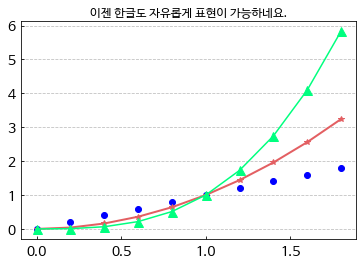

In [5]:
import matplotlib.pyplot as plt
import numpy as np

a = np.arange(0, 2, 0.2)

plt.plot(a, a, 'bo')
plt.plot(a, a**2, color='#e35f62', marker='*', linewidth=2)
plt.plot(a, a**3, color='springgreen', marker='^', markersize=9)
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
plt.tick_params(axis='both', direction='in', length=3, pad=6, labelsize=14)
plt.title('이젠 한글도 자유롭게 표현이 가능하네요.')

plt.show()

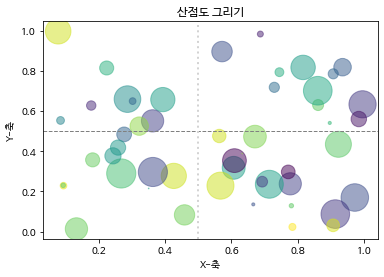

In [35]:
np.random.seed(20000)    # Reproducible random state

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

# 축 제목과 타이틀 지정하기
plt.title('산점도 그리기')
plt.xlabel('X-축')
plt.ylabel('Y-축')

# 그래프 속성 지정하기
#plt.grid(True)
plt.axhline(max(y)/2, 0, 1, color='gray', linestyle='--', linewidth='1')      # 수평선 그리기
plt.axvline(max(x)/2, 0, 1, color='lightgray', linestyle=':', linewidth='2')  # 수직선 그리기

# 그래프 그리기
plt.scatter(x, y, s=area, c=colors, alpha=0.5)


plt.show()



---


# 02. Lambda 함수 사용하기



* 하나의 구문으로 표현되는 함수
* 특정한 기능을 위해 1회만 사용되는 기능이 필요할 때 사용하는 함수
* 사용법
> lambda 입력:출력



### 02-01. lambda 함수의 기본 사용법

In [39]:
# lambda 함수를 정의하기
square = lambda x:x**2

In [40]:
# lambda 함수 호출해서 사용하기
square(8)

64

In [42]:
# 일반적인 함수로 만들어서 사용한다면

# 함수를 정의하고
def square_G(x):
  x = x**2
  return x

# 함수를 호출해서 사용하기
square_G(8)

64

### 02-02. lambda 함수의 응용

* 함수를 인자로 갖는 함수인 filter 또는 map과 같은 함수에 이용함.

**[filter 함수]**

* 어떤 자연수 리스트가 주어졌을 때 짝수만 뽑는 경우를 생각해보기. 

* filter(조건_함수, 리스트)

* 짝수만 골라내는 조건을 어떻게 만들까?

In [62]:
# filter 함수에 사용해보기
nums = list(range(1, 20))
nums

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [64]:
list(filter(lambda x:x%2==0, nums))

[2, 4, 6, 8, 10, 12, 14, 16, 18]



---

# 03. Pandas 사용법 익히기



In [ ]:
# 자료를 받아올 폴더 만들기
!mkdir dataForExer

# 자료 받아오기
!wget https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/Titanic.csv -P ./dataForExer/



>  github에서 자료를 받아 올 때 에러가 나는 이유:</br>
   파일 경로 중 blot -> raw로 바꾸어주어야만 함.

### 03-01. pandas 기본 사용법

In [74]:
# 라이브러리 불러오기
import pandas as pd

In [112]:
# 파일 불러오기
dfData = pd.read_csv('/content/dataForExer/Titanic.csv')

In [ ]:
print(dfData)

In [ ]:
# 자료를 불러오면 반드시 자료의 구조를 확인해야 하며 이때 head()와 tail() 메쏘드를 활용함.
dfData.head()

In [ ]:
dfData.tail(7)

In [ ]:
print(type(dfData))

In [ ]:
# 데이터의 구조를 확인할 때 반드시 살펴봐야 할 내용 중 하나는 데이터의 행과 열 크기 정보임
dfData.shape
#print(dfData.shape)

In [ ]:
print(dfData.shape[0])  # 행에 대한 정보

In [ ]:
print(dfData.shape[1]) # 열에 대한 정보 - 6개의 열로 되어 있음.

In [ ]:
# 보통 열에는 특정 속성들에 대한 값들이 들어 있으며 열 이름을 확인하는 것이 필요함.
print(dfData.columns)

In [ ]:
# 각각의 열의 데이터 형식을 미리 확인하는 것도 중요함.
print(dfData.dtypes)

In [ ]:
# 불러온 데이터의 전체 특성을 살펴보기
print(dfData.info())

In [ ]:
# 열(columns) 이름에 Unnamed: 0이라는 열 이름이 눈에 거슬리는 군요. 자세히 보면 인덱스로 사용된 듯 한데 불필요한 것 같습니다. 지워볼까요?

dfData = dfData.drop(dfData.columns[0], axis=1)

In [ ]:
dfData  # 첫 번째 열이 지워진 것을 확인할 수 있음.

### 03-02. pandas 자료 추출하기

**데이터 추출**은 열 단위로 추출하기 보다는 행단위로 추출하는 경우들이 많기 때문에 행단위 자료를 추출하는 법을 익혀두는 것이 중요합니다.

* loc : 인덱스를 기준으로 행 데이터 추출하기
* iloc : 행 번호를 기준으로 행 데이터 추출하기

In [127]:
# 다시 한번 자료를 간략히 살펴보면
dfData.head()

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0


In [130]:
# 왼쪽에 보이는 것이 인덱스이며 이 인덱스를 이용해서 데이터를 추출하는 방법이 loc 속성입니다.
dfData.loc[0]

Class         1st
Sex          Male
Age         Child
Survived       No
Freq            0
Name: 0, dtype: object

In [132]:
dfData.loc[0:4]   # dfData.head()와 동일한 결과

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0


*질문 1. 마지막 데이터를 보려면 어떻게 해야할까요?*


In [ ]:
# 데이터 구조를 알아보기 위해 사용했던 dfData.shape[0]을 이용하는 방법
dfData.loc[dfData.shape[0]]

In [ ]:
dfData.loc[dfData.shape[0]-1]

In [137]:
# 보다 쉽게 tail() 함수 이용하는 방법
dfData.tail(1)

,Class,Sex,Age,Survived,Freq
31,Crew,Female,Adult,Yes,20


* iloc 속성을 이용하는 방법

In [138]:
dfData.iloc[0]

Class         1st
Sex          Male
Age         Child
Survived       No
Freq            0
Name: 0, dtype: object

In [140]:
dfData.iloc[dfData.shape[0]-1]

Class         Crew
Sex         Female
Age          Adult
Survived       Yes
Freq            20
Name: 31, dtype: object

In [142]:
dfData.iloc[-1]   # 어라 뭐지? 신기하죠!

Class         Crew
Sex         Female
Age          Adult
Survived       Yes
Freq            20
Name: 31, dtype: object

### 03-03. 데이터 저장하기

In [144]:
dfData.to_csv('./dataForExer/Titanic_modify.csv')

In [145]:
# 만일 엑셀 형식으로 저장하고 싶은 경우는
import xlwt

dfData.to_excel('./dataForExer/Titanic_modify.xls')  

In [146]:
# xlsx 형태로 저장하고 싶은 경우에는
import openpyxl
dfData.to_excel('./dataForExer/Titanic_modify.xlsx')

# 04. 데이터 시각화의 필요성

### 04-01. 데이터 훑어보기

데이터 시각화의 중요성을 보여주는 자료는 영국 프랭크 엔스콤이 제안했던 앤스컴 콰르텟(Anscombe's quartet)이 있습니다. 함께 살펴보도록 할께요.

In [1]:
# 앤스컴 콰르텟(Anscombe's quartet)데이터 가져오기
import seaborn as sns

In [2]:
ansQD = sns.load_dataset("anscombe")

In [3]:
# 자료 구조 보기
ansQD.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [7]:
ansQD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
# dataset이라는 열에 대해 조금 더 알아보기
ansQD['dataset']

In [154]:
ansQD['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [155]:
ansQD['dataset'].nunique()

4

In [11]:
# 데이터 셋트 그룹별로 나누어서 속성을 살펴보기
ansQD_G1 = ansQD[ansQD['dataset']=='I']
ansQD_G2 = ansQD[ansQD['dataset']=='II']
ansQD_G3 = ansQD[ansQD['dataset']=='III']
ansQD_G4 = ansQD[ansQD['dataset']=='IV']

In [157]:
# 데이터의 기술 통계량을 알아보기
ansQD_G1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [158]:
# 데이터의 기술 통계량을 알아보기
ansQD_G2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


### 04-02. 그래프의 시각화

In [9]:
# 지난 시간에 배웠던 mapplotlib의 도움을 받아볼까요?
import matplotlib.pyplot as plt


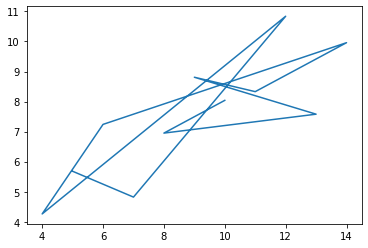

In [13]:
plt.plot(ansQD_G1['x'], ansQD_G1['y'])

Using matplotlib backend: agg


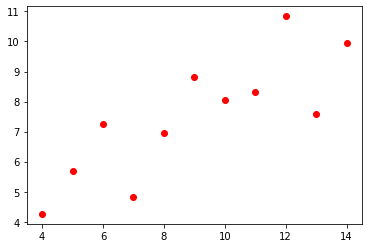

In [14]:
%matplotlib
plt.plot(ansQD_G1['x'], ansQD_G1['y'], 'ro')

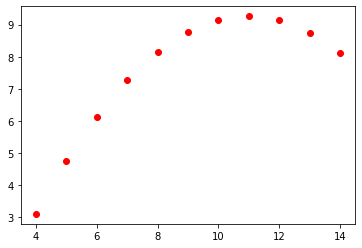

In [15]:
plt.plot(ansQD_G2['x'], ansQD_G2['y'], 'ro')

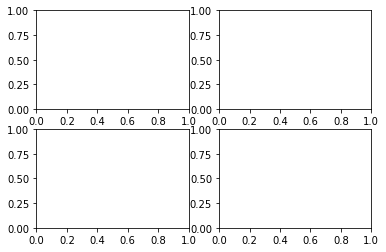

In [17]:
# 4가지 그래프를 모두 같이 비교해볼까요?
fig = plt.figure()

sub_fig_01 = fig.add_subplot(2,2,1)
sub_fig_02 = fig.add_subplot(2,2,2)
sub_fig_03 = fig.add_subplot(2,2,3)
sub_fig_04 = fig.add_subplot(2,2,4)

In [18]:

sub_fig_01.plot(ansQD_G1['x'], ansQD_G1['y'])
sub_fig_02.plot(ansQD_G2['x'], ansQD_G2['y'])
sub_fig_03.plot(ansQD_G3['x'], ansQD_G3['y'])
sub_fig_04.plot(ansQD_G4['x'], ansQD_G4['y'])

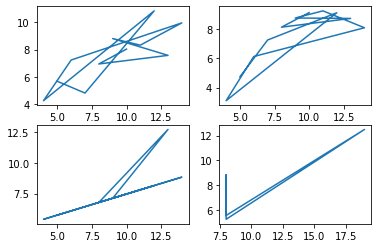

In [19]:
fig

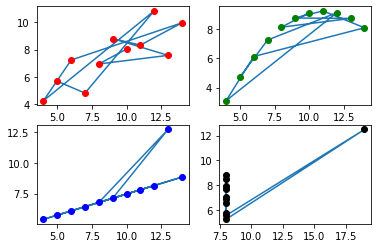

In [21]:
sub_fig_01.plot(ansQD_G1['x'], ansQD_G1['y'], 'ro')
sub_fig_02.plot(ansQD_G2['x'], ansQD_G2['y'], 'go')
sub_fig_03.plot(ansQD_G3['x'], ansQD_G3['y'], 'bo')
sub_fig_04.plot(ansQD_G4['x'], ansQD_G4['y'], 'ko')
fig

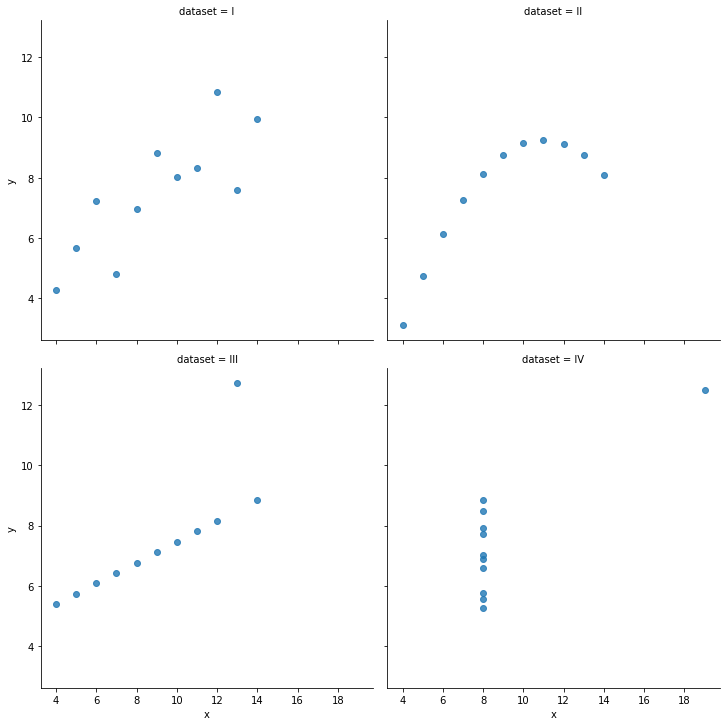

In [22]:
# sns로 그려볼까요?

sns.lmplot(x = 'x' , y = 'y', data = ansQD, fit_reg=False, col='dataset', col_wrap=2)
